In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot  as plt
import seaborn as sns
%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Data Exploration

**Loading Dataset**

In [2]:
dataset = pd.read_csv('data.csv')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [3]:
dataset.shape

(4600, 18)

In [4]:
dataset.head(10)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
5,2014-05-02 00:00:00,490000.0,2.0,1.00,880,6380,1.0,0,0,3,880,0,1938,1994,522 NE 88th St,Seattle,WA 98115,USA
6,2014-05-02 00:00:00,335000.0,2.0,2.00,1350,2560,1.0,0,0,3,1350,0,1976,0,2616 174th Ave NE,Redmond,WA 98052,USA
7,2014-05-02 00:00:00,482000.0,4.0,2.50,2710,35868,2.0,0,0,3,2710,0,1989,0,23762 SE 253rd Pl,Maple Valley,WA 98038,USA
8,2014-05-02 00:00:00,452500.0,3.0,2.50,2430,88426,1.0,0,0,4,1570,860,1985,0,46611-46625 SE 129th St,North Bend,WA 98045,USA
9,2014-05-02 00:00:00,640000.0,4.0,2.00,1520,6200,1.5,0,0,3,1520,0,1945,2010,6811 55th Ave NE,Seattle,WA 98115,USA


**Delete date column** Date column is irrelevant

In [5]:
dataset.drop(['date'], axis = 1, inplace = True)
dataset.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


**Checking how many different Countries are there**

In [6]:
dataset.country.value_counts()

country
USA    4600
Name: count, dtype: int64

Deleting the country column as all the records have the same country, hence irrelevant

In [7]:
dataset.drop(['country'], axis = 1, inplace = True)
dataset.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052


Since we already have statezip, we can safely delete street and city.

In [8]:
dataset.drop(['street', 'city'], axis = 1, inplace = True)
dataset.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,statezip
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,WA 98133
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,WA 98119
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,WA 98042
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,WA 98008
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,WA 98052


**Checking for null values**

In [9]:
dataset.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
statezip         0
dtype: int64

*No null values present*

# General corellation analysis

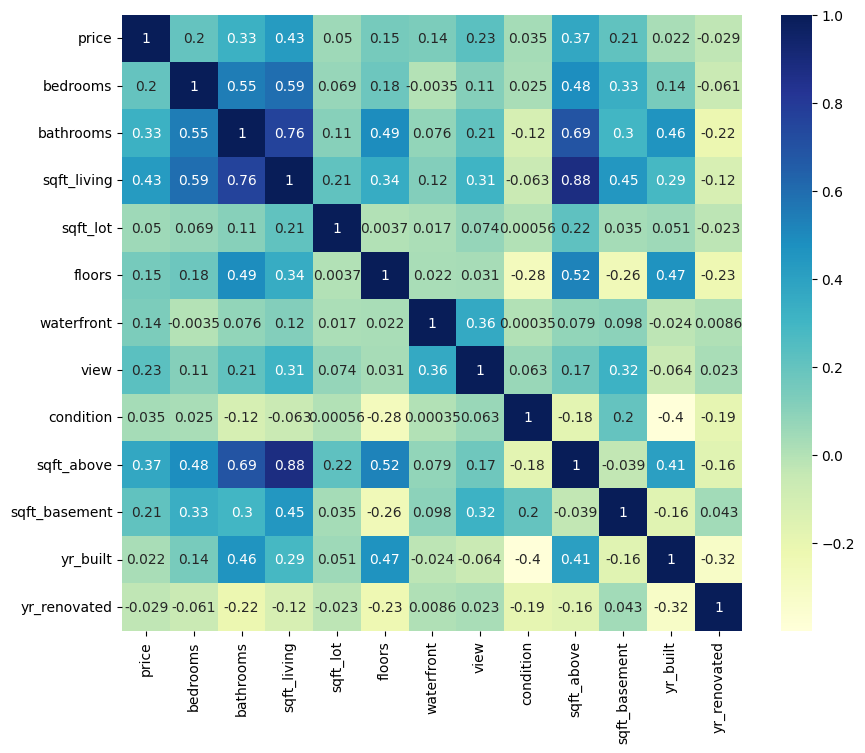

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

a4_dims = (10, 8)
fig, ax = plt.subplots(figsize=a4_dims)

# Select only numeric columns
numeric_dataset = dataset.select_dtypes(include=['float64', 'int64'])

# Calculate correlation matrix
cor = numeric_dataset.corr()

# Plot heatmap
sns.heatmap(cor, annot=True, cmap="YlGnBu", ax=ax)
plt.show()


# Analysis on number of bedroom feature

corellation of price with no. of bedrooms

<Axes: xlabel='bedrooms', ylabel='price'>

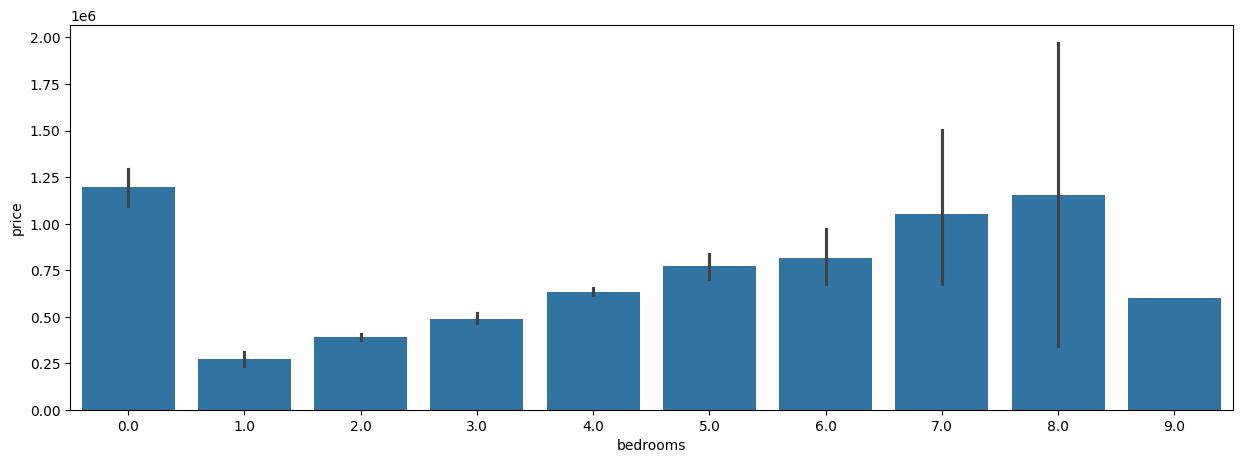

In [12]:
a4_dims = (15, 5)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(x = dataset.bedrooms, y = dataset.price)

*0 & 9 bedrooms are probably an outlier. Let's dive deeper*

Let's get the count  of respective no. of bedrooms

In [13]:
dataset.groupby('bedrooms').price.agg([len, min, max])

C:\Users\Ahmad Ali\AppData\Local\Temp\ipykernel_9872\3376453444.py:1: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  dataset.groupby('bedrooms').price.agg([len, min, max])
C:\Users\Ahmad Ali\AppData\Local\Temp\ipykernel_9872\3376453444.py:1: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  dataset.groupby('bedrooms').price.agg([len, min, max])


,len,min,max
bedrooms,,,
0.0,2,1095000.0,1295648.0
1.0,38,0.0,540000.0
2.0,566,0.0,1695000.0
3.0,2032,0.0,26590000.0
4.0,1531,0.0,4489000.0
5.0,353,0.0,7062500.0
6.0,61,0.0,3100000.0
7.0,14,280000.0,3200000.0
8.0,2,340000.0,1970000.0


*Hence proved that 0 & 9 are outliers. Let's remove them*

In [14]:
df = dataset[(dataset.bedrooms > 0) & (dataset.bedrooms < 9)].copy()

In [15]:
df.shape

(4597, 14)

# Analysis on the zipcode feature

Checking for unique zip code

In [16]:
df.statezip.value_counts()

statezip
WA 98103    147
WA 98052    135
WA 98117    132
WA 98115    130
WA 98006    110
           ... 
WA 98047      6
WA 98288      3
WA 98050      2
WA 98354      2
WA 98068      1
Name: count, Length: 77, dtype: int64

*All the zip codes are of Washington. Let's do a correlation analysis of zip codes*

<Axes: xlabel='price', ylabel='statezip'>

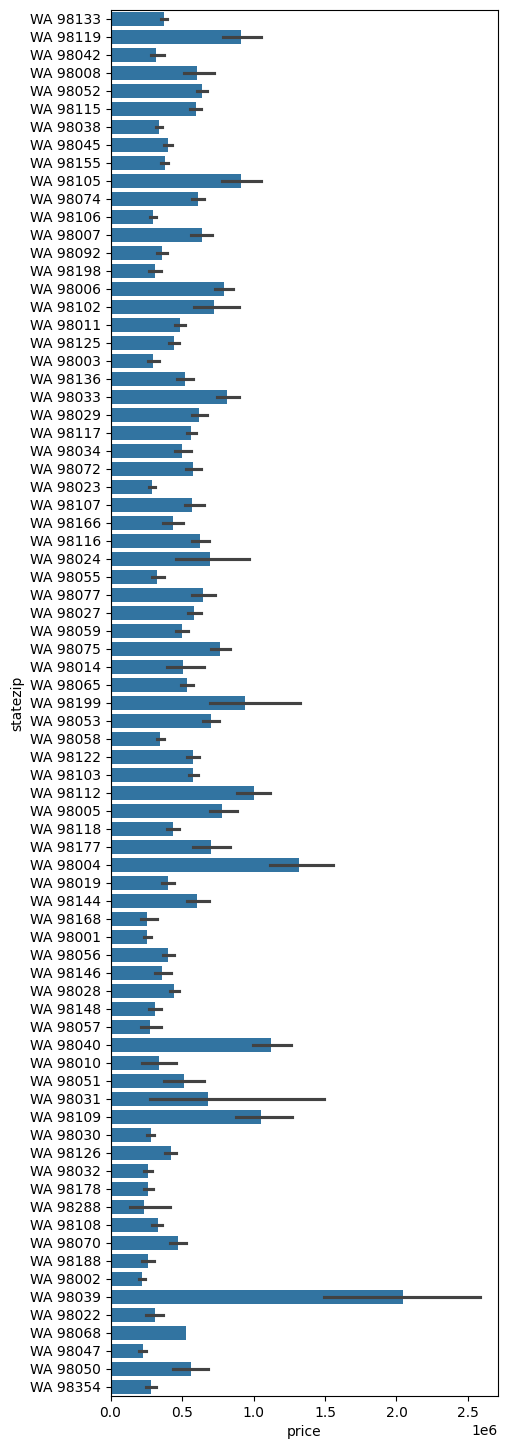

In [17]:
a4_dims = (5, 18)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(ax = ax, x = df.price, y = df.statezip)

Let's look at the distribution of price

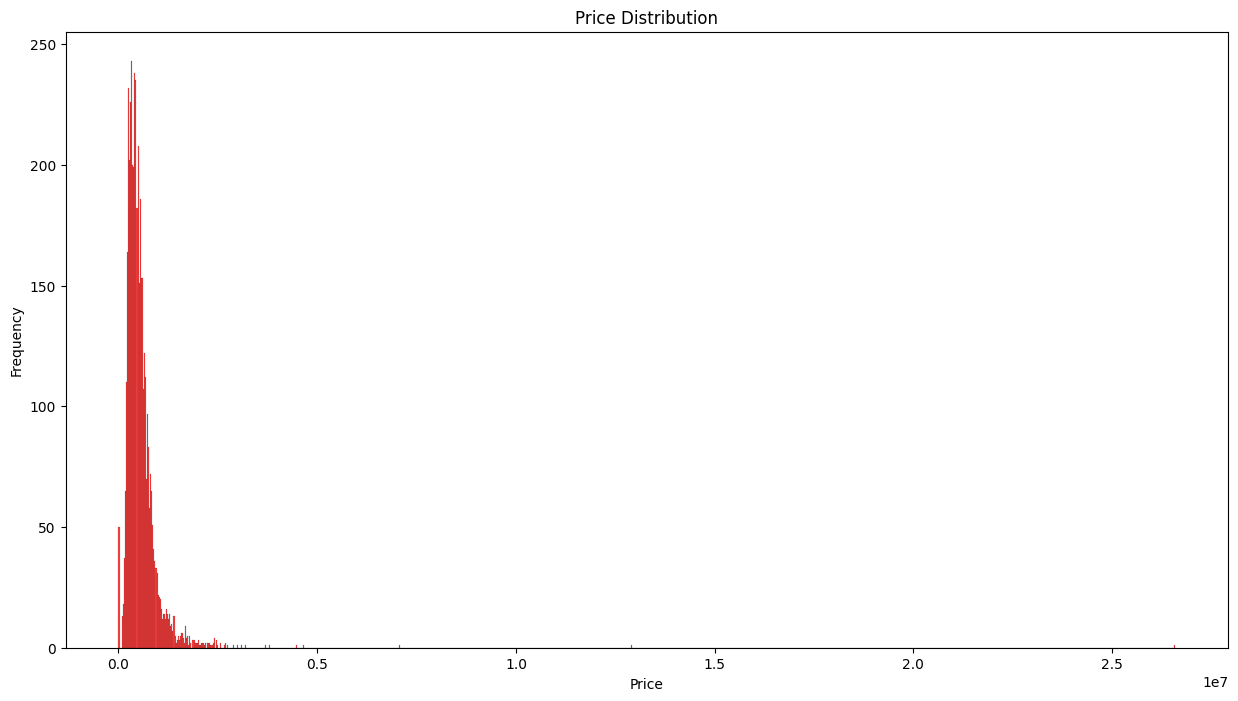

In [19]:
a4_dims = (15, 8)
fig, ax = plt.subplots(figsize=a4_dims)

# Use histplot instead of distplot
sns.histplot(data=df, x='price', bins=1000, color='r', ax=ax)

plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()


Group by on price

In [20]:
df.price.agg([min, max])

C:\Users\Ahmad Ali\AppData\Local\Temp\ipykernel_9872\1315707.py:1: FutureWarning: The provided callable <built-in function min> is currently using Series.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  df.price.agg([min, max])
C:\Users\Ahmad Ali\AppData\Local\Temp\ipykernel_9872\1315707.py:1: FutureWarning: The provided callable <built-in function max> is currently using Series.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  df.price.agg([min, max])


min           0.0
max    26590000.0
Name: price, dtype: float64

**How many instances are there with price = 0?**

In [21]:
len(df[(df.price == 0)])

49

*need to set some price for these records*

# Analysis on bathroom feature w.r.t. price

<Axes: xlabel='bathrooms', ylabel='price'>

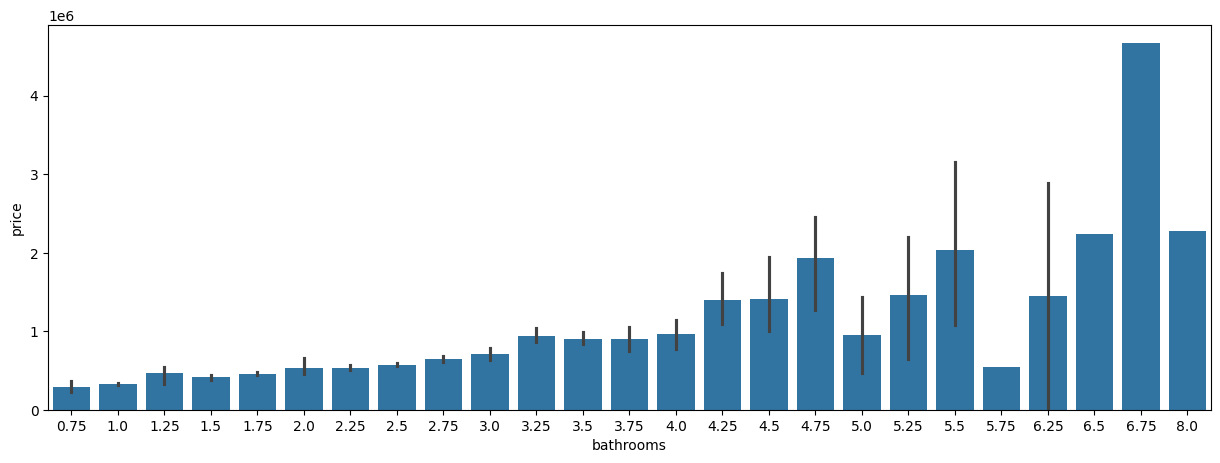

In [22]:
a4_dims = (15, 5)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(x = df.bathrooms, y = df.price)

# Analysis on all the instances whose price is 0

Getting all those instances

In [23]:
zero_price = df[(df.price == 0)].copy()
zero_price.shape

(49, 14)

In [24]:
zero_price.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,statezip
4354,0.0,3.0,1.75,1490,10125,1.0,0,0,4,1490,0,1962,0,WA 98001
4356,0.0,4.0,2.75,2600,5390,1.0,0,0,4,1300,1300,1960,2001,WA 98199
4357,0.0,6.0,2.75,3200,9200,1.0,0,2,4,1600,1600,1953,1983,WA 98146
4358,0.0,5.0,3.50,3480,36615,2.0,0,0,4,2490,990,1983,0,WA 98075
4361,0.0,5.0,1.50,1500,7112,1.0,0,0,5,760,740,1920,0,WA 98166


Let's get the unique value of the most important features

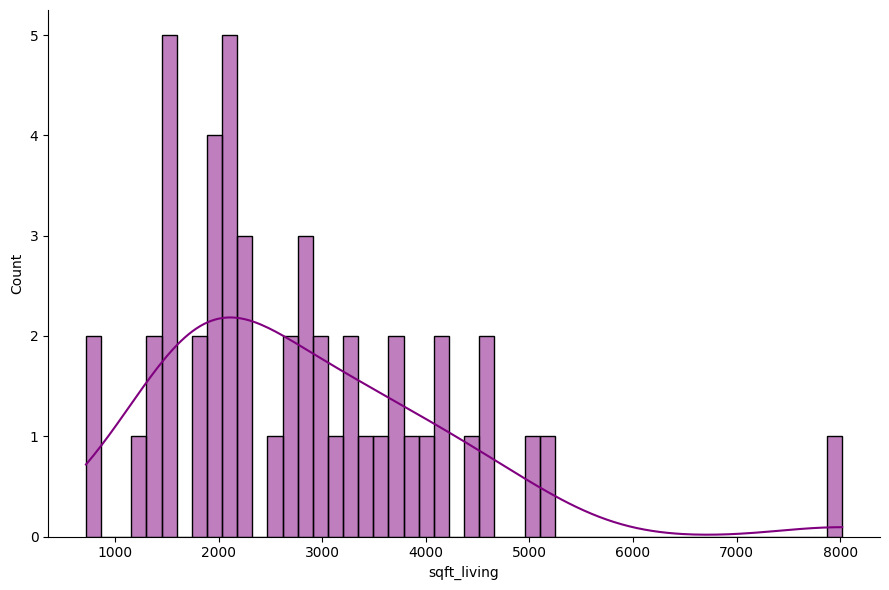

In [27]:
sns.displot(data=zero_price, x="sqft_living", bins=50, kde=True, color='purple', height=6, aspect=1.5)

*Most of the 0 price houses are in the range 1000 - 5000 sqft*

Let's find more correlation between the 0 price houses

In [28]:
zero_price.agg([min, max, 'mean', 'median'])

C:\Users\Ahmad Ali\AppData\Local\Temp\ipykernel_9872\3246869973.py:1: FutureWarning: The provided callable <built-in function min> is currently using Series.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  zero_price.agg([min, max, 'mean', 'median'])
C:\Users\Ahmad Ali\AppData\Local\Temp\ipykernel_9872\3246869973.py:1: FutureWarning: The provided callable <built-in function max> is currently using Series.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  zero_price.agg([min, max, 'mean', 'median'])
C:\Users\Ahmad Ali\AppData\Local\Temp\ipykernel_9872\3246869973.py:1: FutureWarning: The provided callable <built-in function min> is currently using Series.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  zero_price.agg([min, m

TypeError: Could not convert string 'WA 98001WA 98199WA 98146WA 98075WA 98166WA 98074WA 98022WA 98166WA 98065WA 98004WA 98040WA 98042WA 98008WA 98155WA 98105WA 98042WA 98188WA 98178WA 98023WA 98028WA 98108WA 98115WA 98040WA 98038WA 98074WA 98077WA 98178WA 98004WA 98056WA 98136WA 98074WA 98010WA 98040WA 98002WA 98168WA 98108WA 98040WA 98074WA 98008WA 98065WA 98155WA 98023WA 98125WA 98177WA 98116WA 98004WA 98007WA 98006WA 98056' to numeric

**We are going to use common ranges from the above table to get similar records from the original dataset and non-zero price to set the values of 0 price instances**

In [29]:
sim_from_ori = df[(df.bedrooms == 4) & (df.bathrooms > 1) & (df.bathrooms < 4) & (df.sqft_living > 2500) & (df.sqft_living < 3000) & (df.floors < 3) & (df.yr_built < 1970)].copy()

In [30]:
sim_from_ori.shape

(79, 14)

In [31]:
sim_from_ori.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,statezip
11,1400000.0,4.0,2.50,2920,4000,1.5,0,0,5,1910,1010,1909,1988,WA 98105
172,407000.0,4.0,2.25,2810,23400,1.0,0,1,3,1710,1100,1958,2004,WA 98198
207,360000.0,4.0,2.00,2680,18768,1.0,0,0,5,2680,0,1965,0,WA 98001
257,749950.0,4.0,2.75,2600,6050,2.0,0,0,5,1960,640,1949,0,WA 98116
261,581000.0,4.0,2.00,2510,13695,1.0,0,0,4,1280,1230,1961,2001,WA 98033


Get the average price of these instances

In [32]:
sim_from_ori.price.mean()

np.float64(735475.0370705189)

Let's confirm this by comparing with the other house price of the same yr_built and having similar sq_ft

In [33]:
yr_sqft = df[(df.sqft_living > 2499) & (df.sqft_living < 2900)].copy()
yr_price_avg = yr_sqft.groupby('yr_built').price.agg('mean')

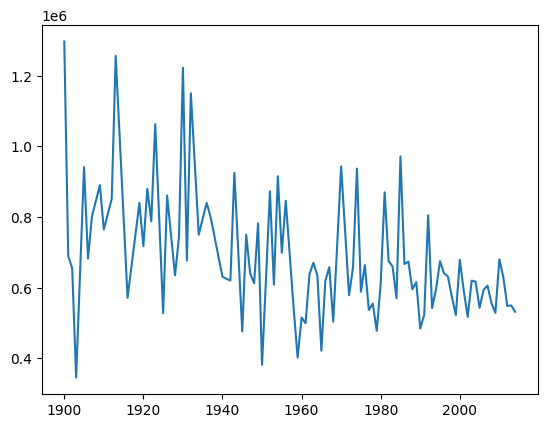

In [34]:
plt.plot(yr_price_avg)

*This confirms our assumption. The avg. pricing of such houses is between 600000 to 800000*

**Replacing all 0 price values with $730000**

In [36]:
df.replace({'price': 0}, 735000, inplace=True)
len(df[(df.price == 0)])

0

In [37]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,statezip
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,WA 98133
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,WA 98119
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,WA 98042
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,WA 98008
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,WA 98052


# Feature reduction

Since sqft_living is the most important feature and sqft_living & sqft_above are highly corellated we are going  to remove the sqft_above feature.

In [38]:
df.drop(['sqft_above'], axis = 1, inplace = True)
df.shape

(4597, 13)

# Handling the index order
By removing some rows our original dataset index is changed. Let's fix it

In [39]:
df = df.reset_index()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4597 entries, 0 to 4596
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          4597 non-null   int64  
 1   price          4597 non-null   float64
 2   bedrooms       4597 non-null   float64
 3   bathrooms      4597 non-null   float64
 4   sqft_living    4597 non-null   int64  
 5   sqft_lot       4597 non-null   int64  
 6   floors         4597 non-null   float64
 7   waterfront     4597 non-null   int64  
 8   view           4597 non-null   int64  
 9   condition      4597 non-null   int64  
 10  sqft_basement  4597 non-null   int64  
 11  yr_built       4597 non-null   int64  
 12  yr_renovated   4597 non-null   int64  
 13  statezip       4597 non-null   object 
dtypes: float64(4), int64(9), object(1)
memory usage: 502.9+ KB


# Handling categorical statezip feature

Performing label encoder

In [40]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [41]:
df['statezip_encoded'] = le.fit_transform(df.statezip)
df.head()

,index,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_basement,yr_built,yr_renovated,statezip,statezip_encoded
0,0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,0,1955,2005,WA 98133,62
1,1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,280,1921,0,WA 98119,58
2,2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,0,1966,0,WA 98042,26
3,3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1963,0,WA 98008,7
4,4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,800,1976,1992,WA 98052,31


Let's confirm our label encoding

In [42]:
df.statezip_encoded.value_counts()

statezip_encoded
47    147
31    135
56    132
54    130
5     110
     ... 
28      6
75      3
29      2
76      2
39      1
Name: count, Length: 77, dtype: int64

Drop the statezip field

In [43]:
df.drop(['statezip'], axis = 1, inplace = True)
df.head()

,index,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_basement,yr_built,yr_renovated,statezip_encoded
0,0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,0,1955,2005,62
1,1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,280,1921,0,58
2,2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,0,1966,0,26
3,3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1963,0,7
4,4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,800,1976,1992,31


**One hot encoding**

In [44]:
from sklearn.preprocessing import OneHotEncoder
ohc = OneHotEncoder()

In [45]:
ohc_df = pd.DataFrame(ohc.fit_transform(df[['statezip_encoded']]).toarray())
# ohc_df = ohc_df.astype(int)
ohc_df.head()

,0,1,2,3,4,5,6,7,8,9,...,67,68,69,70,71,72,73,74,75,76
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Mergeing ohc_df into the main dataset

In [46]:
df = df.join(ohc_df)
df.head()

,index,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,67,68,69,70,71,72,73,74,75,76
0,0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
df.tail()

,index,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,67,68,69,70,71,72,73,74,75,76
4592,4595,308166.666667,3.0,1.75,1510,6360,1.0,0,0,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4593,4596,534333.333333,3.0,2.50,1460,7573,2.0,0,0,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4594,4597,416904.166667,3.0,2.50,3010,7014,2.0,0,0,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4595,4598,203400.000000,4.0,2.00,2090,6630,1.0,0,0,3,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4596,4599,220600.000000,3.0,2.50,1490,8102,2.0,0,0,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Drop the statezip_encoded field

In [48]:
df.drop(['statezip_encoded'], axis = 1, inplace = True)

In [49]:
df.info

<bound method DataFrame.info of       index         price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0         0  3.130000e+05       3.0       1.50         1340      7912     1.5   
1         1  2.384000e+06       5.0       2.50         3650      9050     2.0   
2         2  3.420000e+05       3.0       2.00         1930     11947     1.0   
3         3  4.200000e+05       3.0       2.25         2000      8030     1.0   
4         4  5.500000e+05       4.0       2.50         1940     10500     1.0   
...     ...           ...       ...        ...          ...       ...     ...   
4592   4595  3.081667e+05       3.0       1.75         1510      6360     1.0   
4593   4596  5.343333e+05       3.0       2.50         1460      7573     2.0   
4594   4597  4.169042e+05       3.0       2.50         3010      7014     2.0   
4595   4598  2.034000e+05       4.0       2.00         2090      6630     1.0   
4596   4599  2.206000e+05       3.0       2.50         1490      8102     2.0

# Splitting into train and test set

In [50]:
df.shape

(4597, 90)

In [51]:
X = df.iloc[:, 1:]
X.shape

(4597, 89)

In [52]:
y = df.price

Splitting dataset into train and remainder

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_rem, y_train, y_rem = train_test_split(X, y, test_size=0.1, random_state=42)

In [54]:
print(len(X_train) / len(df))

0.8999347400478573


Splitting remainder into validation and test set

In [55]:
X_val, X_test, y_val, y_test = train_test_split(X_rem, y_rem, test_size=0.5, random_state=42)
print(len(X_test) / len(y_rem))

0.5


Let's print the length of all the 3 splits

In [56]:
print(len(X_train))
print(len(X_val))
print(len(X_val))

4137
230
230


# Linear regression

In [57]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

Fitting the model

In [59]:
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)  # Do this for X_test too if you're using it later


In [60]:
lin_reg.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [62]:
# Ensure all column names are strings
X_train.columns = X_train.columns.astype(str)
X_val.columns = X_val.columns.astype(str)

# Fit the model
lin_reg.fit(X_train, y_train)

# Predict and evaluate
y_pred = lin_reg.predict(X_val)
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
print("RMSE:", rmse)


RMSE: 5.319196052022269e-10


In [63]:
y_val.head(10)

1073    175000.0
4524    950100.0
4434    309487.5
2572    427000.0
4310    375000.0
4017    665000.0
4241    759000.0
3139    425000.0
2283    325000.0
4200    679000.0
Name: price, dtype: float64

In [64]:
y_pred

array([  175000.        ,   950100.        ,   309487.5       ,
         427000.        ,   375000.        ,   665000.        ,
         759000.        ,   425000.        ,   325000.        ,
         679000.        ,   336000.        ,   630000.        ,
         492000.        ,   842500.        ,   264000.        ,
         383962.        ,   425000.        ,   925000.        ,
         235000.        ,   648360.        ,   580000.        ,
         615000.        ,   277000.        ,   225000.        ,
        2000000.        ,   565000.        ,   740000.        ,
         455000.        ,   385500.        ,   564000.        ,
         645000.        ,   583000.        ,   360000.        ,
         280000.        ,   285000.        ,   638000.        ,
         223000.        ,   239950.        ,   450000.        ,
         400000.        ,   375000.        ,   970000.        ,
         560000.        ,   825000.        ,   888550.        ,
         440000.        ,   199950.     

In [65]:
y_pred_test = lin_reg.predict(X_test)
mse = mean_squared_error(y_pred_test, y_test)
rmse = np.sqrt(mse)
rmse

np.float64(1.9195294529014674e-10)

In [66]:
lin_reg.score(X_test, y_test)

1.0

In [67]:
y_test

3454    450000.0
3857    300000.0
1818    174500.0
856     215000.0
1001    430000.0
          ...   
3760    392000.0
2596    650000.0
1839    327500.0
1835    320000.0
787     317000.0
Name: price, Length: 230, dtype: float64

In [68]:
y_pred_test

array([ 450000.      ,  300000.      ,  174500.      ,  215000.      ,
        430000.      ,  421000.      ,  280000.      ,  380000.      ,
        260000.      ,  453500.      ,  299950.      ,  326983.333333,
        440000.      ,  270000.      ,  869000.      ,  681716.      ,
        100000.      ,  331366.666667,  540000.      ,  280000.      ,
        399500.      ,  330000.      ,  399950.      ,  250600.      ,
        640000.      ,  530000.      ,  395000.      ,  615000.      ,
        840000.      ,  805000.      ,  381000.      ,  625000.      ,
        624800.      ,  870000.      ,  315000.      ,  375000.      ,
        810000.      ,  660000.      , 1080000.      ,  274950.      ,
        440000.      ,  510000.      ,  386380.      ,  510000.      ,
        282508.888889,  860000.      ,  443000.      ,  459500.      ,
        545000.      ,  623000.      ,  211000.      ,  590000.      ,
        735000.      ,  275000.      ,  747500.      ,  630000.      ,
      